In [1]:
!pip install polars

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
import pickle
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Problem Statement

The objective of this project was to model our user and game reviews from the website BoardGameGeeks.com, in order to predict for and generate a list of game recommendations, which provides the user a customised experience according to games they have previously reviewed. As our recommendation system wants to be as up to date as possible, we will be focusing on the performance of our model on more modern titles which would roughly be from 2017 to 2021(the latest date in our dataset). 

For our modelling task, we will first take a look at all avaliable data, before narrowing to only the two most important files, **'games.csv'** and **'user_ratings.csv'**

In [3]:
#function for exploring each file
def explore_dfs(dict_df):
    for k in dict_df:
        print(f'dataframe {k}')
        print('\n')
        print(f'dataframe {k}, head')
        display(dict_df[k].head())
        print('\n')
        print(f'dataframe {k}, shape')
        display(dict_df[k].shape)
        print('\n')
        print(f'dataframe {k}, describe')
        display(dict_df[k].describe())
        print('\n')
        print(f'dataframe {k}, info')
        display(dict_df[k].info())
        print('='*100, '\n')
    

In [4]:
import os
input_path = "../data/input"

all_paths = {i : f'{input_path}/{i}' #assign key of each file in list to an appended 
    for i in os.listdir(input_path) 
             if '.csv' in i}
 

Quick look at the size of dataset

In [5]:
#showing size of dataset
for k,v in all_paths.items():
    print(f'size of {k} is {os.stat(v).st_size/ 1_000_000_000} GB')

size of artists_reduced.csv is 0.073851622 GB
size of designers_reduced.csv is 0.070035299 GB
size of games.csv is 0.02214139 GB
size of mechanics.csv is 0.007045861 GB
size of publishers_reduced.csv is 0.081968251 GB
size of ratings_distribution.csv is 0.008691368 GB
size of subcategories.csv is 0.000597465 GB
size of themes.csv is 0.009678376 GB
size of user_ratings.csv is 0.399396389 GB


Displaying dictionary of file to strings for access later

In [6]:
all_paths

{'artists_reduced.csv': '../data/input/artists_reduced.csv',
 'designers_reduced.csv': '../data/input/designers_reduced.csv',
 'games.csv': '../data/input/games.csv',
 'mechanics.csv': '../data/input/mechanics.csv',
 'publishers_reduced.csv': '../data/input/publishers_reduced.csv',
 'ratings_distribution.csv': '../data/input/ratings_distribution.csv',
 'subcategories.csv': '../data/input/subcategories.csv',
 'themes.csv': '../data/input/themes.csv',
 'user_ratings.csv': '../data/input/user_ratings.csv'}

In [7]:
#making a copy of all_paths as plan to store dataframes with corresponding filenames
all_paths_csv = all_paths.copy()

In [8]:
all_paths_csv

{'artists_reduced.csv': '../data/input/artists_reduced.csv',
 'designers_reduced.csv': '../data/input/designers_reduced.csv',
 'games.csv': '../data/input/games.csv',
 'mechanics.csv': '../data/input/mechanics.csv',
 'publishers_reduced.csv': '../data/input/publishers_reduced.csv',
 'ratings_distribution.csv': '../data/input/ratings_distribution.csv',
 'subcategories.csv': '../data/input/subcategories.csv',
 'themes.csv': '../data/input/themes.csv',
 'user_ratings.csv': '../data/input/user_ratings.csv'}

In [9]:
for k,v in all_paths_csv.items():
    all_paths_csv[k] = pd.read_csv(v)

calling function that displays each dataframe, the head, shape, description and info

## displaying all info related to each dataframes

In [10]:
explore_dfs(all_paths_csv)

dataframe artists_reduced.csv


dataframe artists_reduced.csv, head


,Harald Lieske,Franz Vohwinkel,Peter Whitley,Scott Okumura,(Uncredited),Doris Matthäus,Alan R. Moon,Alexander Jung,Andrea Boekhoff,Björn Pertoft,...,Nathan Meunier,Andrey Gordeev,Zbigniew Umgelter,Jeppe Norsker,Daniel Profiri,Aleksander Zawada,Simon Douchy,Felix Wermke,BGGId,Low-Exp Artist
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0




dataframe artists_reduced.csv, shape


(21925, 1681)



dataframe artists_reduced.csv, describe


,Harald Lieske,Franz Vohwinkel,Peter Whitley,Scott Okumura,(Uncredited),Doris Matthäus,Alan R. Moon,Alexander Jung,Andrea Boekhoff,Björn Pertoft,...,Nathan Meunier,Andrey Gordeev,Zbigniew Umgelter,Jeppe Norsker,Daniel Profiri,Aleksander Zawada,Simon Douchy,Felix Wermke,BGGId,Low-Exp Artist
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,0.005975,0.014504,0.000593,0.000410,0.016556,0.003740,0.000228,0.002463,0.000730,0.001231,...,0.000182,0.000182,0.000410,0.000182,0.000182,0.000319,0.000182,0.000228,117652.663216,0.318769
std,0.077068,0.119559,0.024343,0.020257,0.127605,0.061043,0.015100,0.049568,0.027005,0.035072,...,0.013506,0.013506,0.020257,0.013506,0.013506,0.017866,0.013506,0.015100,104628.721777,0.466010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12346.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105305.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206169.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,349161.000000,1.000000




dataframe artists_reduced.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 1681 entries, Harald Lieske to Low-Exp Artist
dtypes: int64(1681)
memory usage: 281.2 MB


None


dataframe designers_reduced.csv


dataframe designers_reduced.csv, head


,Karl-Heinz Schmiel,"G. W. ""Jerry"" D'Arcey",Reiner Knizia,Sid Sackson,Jean du Poël,Martin Wallace,Richard Ulrich,Wolfgang Kramer,Alan R. Moon,Uwe Rosenberg,...,Thomas Dupont,Mathieu Casnin,Sean Fletcher,Moritz Dressler,Molly Johnson,Robert Melvin,Shawn Stankewich,Nathan Meunier,BGGId,Low-Exp Designer
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0




dataframe designers_reduced.csv, shape


(21925, 1594)



dataframe designers_reduced.csv, describe


,Karl-Heinz Schmiel,"G. W. ""Jerry"" D'Arcey",Reiner Knizia,Sid Sackson,Jean du Poël,Martin Wallace,Richard Ulrich,Wolfgang Kramer,Alan R. Moon,Uwe Rosenberg,...,Thomas Dupont,Mathieu Casnin,Sean Fletcher,Moritz Dressler,Molly Johnson,Robert Melvin,Shawn Stankewich,Nathan Meunier,BGGId,Low-Exp Designer
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,0.000821,0.000274,0.015416,0.001824,0.000319,0.004196,0.000410,0.006203,0.003421,0.003101,...,0.000228,0.000182,0.000228,0.000365,0.000228,0.000228,0.000228,0.000182,117652.663216,0.381072
std,0.028642,0.016541,0.123204,0.042675,0.017866,0.064643,0.020257,0.078516,0.058388,0.055606,...,0.015100,0.013506,0.015100,0.019099,0.015100,0.015100,0.015100,0.013506,104628.721777,0.485661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12346.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105305.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206169.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,349161.000000,1.000000




dataframe designers_reduced.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 1594 entries, Karl-Heinz Schmiel to Low-Exp Designer
dtypes: int64(1594)
memory usage: 266.6 MB


None


dataframe games.csv


dataframe games.csv, head


,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.45440,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.18227,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.23129,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.33583,2,6,...,21926,21926,0,1,0,0,0,0,0,0




dataframe games.csv, shape


(21925, 48)



dataframe games.csv, describe


,BGGId,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,16395.000000,16034.000000,...,21925.000000,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,1985.494914,1.982131,6.424922,5.685673,1.516374,2.007343,5.707868,10.004391,216.461819,...,21295.352201,21062.680274,0.055827,0.10577,0.161003,0.105633,0.013820,0.050855,0.029190,0.040182
std,104628.721777,212.486214,0.848983,0.932477,0.365311,0.285578,0.693093,15.014643,3.269157,236.595136,...,3637.139987,4219.776597,0.229592,0.30755,0.367542,0.307374,0.116745,0.219707,0.168344,0.196391
min,1.000000,-3500.000000,0.000000,1.041330,3.574810,0.196023,0.000000,0.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,2001.000000,1.333300,5.836960,5.510300,1.320720,2.000000,4.000000,8.000000,24.027778,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,2011.000000,1.968800,6.453950,5.546540,1.476880,2.000000,4.000000,10.000000,138.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,2017.000000,2.525200,7.052450,5.679890,1.665470,2.000000,6.000000,12.000000,351.000000,...,21926.000000,21926.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,2021.000000,5.000000,9.914290,8.514880,4.277280,10.000000,999.000000,21.000000,1757.000000,...,21926.000000,21926.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




dataframe games.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   AvgRating            21925 non-null  float64
 6   BayesAvgRating       21925 non-null  float64
 7   StdDev               21925 non-null  float64
 8   MinPlayers           21925 non-null  int64  
 9   MaxPlayers           21925 non-null  int64  
 10  ComAgeRec            16395 non-null  float64
 11  LanguageEase         16034 non-null  float64
 12  BestPlayers          21925 non-null  int64  
 13  GoodPlayers          21925 non-null  object 
 14  NumOwned             21925 non-null  int64  
 15  NumWant 

None


dataframe mechanics.csv


dataframe mechanics.csv, head


,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




dataframe mechanics.csv, shape


(21925, 158)



dataframe mechanics.csv, describe


,BGGId,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,...,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,0.001688,0.074755,0.052771,0.295827,0.205063,0.054002,0.018335,0.111197,0.001870,...,0.006249,0.000228,0.000867,0.002828,0.000684,0.002919,0.000730,0.001460,0.050399,0.020935
std,104628.721777,0.041046,0.263001,0.223581,0.456424,0.403757,0.226027,0.134164,0.314383,0.043204,...,0.078802,0.015100,0.029426,0.053103,0.026148,0.053950,0.027005,0.038177,0.218772,0.143170
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




dataframe mechanics.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 158 entries, BGGId to Physical
dtypes: int64(158)
memory usage: 26.4 MB


None


dataframe publishers_reduced.csv


dataframe publishers_reduced.csv, head


,Hans im Glück,Moskito Spiele,Portal Games,Spielworxx,Stronghold Games,"Valley Games, Inc.",YOKA Games,sternenschimmermeer,E.S. Lowe,Milton Bradley,...,Cacahuete Games,BlackSands Games,Norsker Games,Perro Loko Games,Funko Games,Origame,Deep Print Games,Hidden Industries GmbH,BGGId,Low-Exp Publisher
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1




dataframe publishers_reduced.csv, shape


(21925, 1866)



dataframe publishers_reduced.csv, describe


,Hans im Glück,Moskito Spiele,Portal Games,Spielworxx,Stronghold Games,"Valley Games, Inc.",YOKA Games,sternenschimmermeer,E.S. Lowe,Milton Bradley,...,Cacahuete Games,BlackSands Games,Norsker Games,Perro Loko Games,Funko Games,Origame,Deep Print Games,Hidden Industries GmbH,BGGId,Low-Exp Publisher
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,0.005747,0.000456,0.007115,0.001551,0.005838,0.001003,0.001916,0.002189,0.001368,0.018381,...,0.000228,0.000182,0.000182,0.000182,0.001460,0.000182,0.000274,0.000182,117652.663216,0.217286
std,0.075592,0.021352,0.084053,0.039350,0.076186,0.031662,0.043727,0.046740,0.036966,0.134327,...,0.015100,0.013506,0.013506,0.013506,0.038177,0.013506,0.016541,0.013506,104628.721777,0.412408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12346.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105305.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206169.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,349161.000000,1.000000




dataframe publishers_reduced.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 1866 entries, Hans im Glück to Low-Exp Publisher
dtypes: int64(1866)
memory usage: 312.1 MB


None


dataframe ratings_distribution.csv


dataframe ratings_distribution.csv, head


,BGGId,0.0,0.1,0.5,1.0,1.1,1.2,1.3,1.4,1.5,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,total_ratings
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,5.0,11.0,86.0,3.0,4.0,6.0,8.0,426.0,5352.0
1,2,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,17.0,562.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,7.0,4.0,77.0,3.0,1.0,5.0,3.0,477.0,15148.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,342.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,8.0,4.0,82.0,7.0,9.0,10.0,5.0,905.0,18387.0




dataframe ratings_distribution.csv, shape


(21925, 96)



dataframe ratings_distribution.csv, describe


,BGGId,0.0,0.1,0.5,1.0,1.1,1.2,1.3,1.4,1.5,...,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10.0,total_ratings
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,0.000137,0.000091,0.000137,2.423170,0.016009,0.009350,0.005428,0.005473,0.092360,...,0.899840,0.445063,0.391699,5.676260,0.332680,0.272064,0.470513,0.273706,43.134550,863.955074
std,104628.721777,0.011697,0.009551,0.011697,16.726742,0.172104,0.125095,0.078283,0.080293,0.962439,...,7.175174,3.648579,3.289907,48.440295,2.977087,2.490761,4.480513,2.575750,334.948774,3627.083866
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,57.000000
50%,105305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,125.000000
75%,206169.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,398.000000
max,349161.000000,1.000000,1.000000,1.000000,1100.000000,11.000000,7.000000,3.000000,3.000000,64.000000,...,326.000000,157.000000,153.000000,2155.000000,138.000000,103.000000,219.000000,144.000000,18367.000000,107760.000000




dataframe ratings_distribution.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 96 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BGGId          21925 non-null  int64  
 1   0.0            21925 non-null  float64
 2   0.1            21925 non-null  float64
 3   0.5            21925 non-null  float64
 4   1.0            21925 non-null  float64
 5   1.1            21925 non-null  float64
 6   1.2            21925 non-null  float64
 7   1.3            21925 non-null  float64
 8   1.4            21925 non-null  float64
 9   1.5            21925 non-null  float64
 10  1.6            21925 non-null  float64
 11  1.7            21925 non-null  float64
 12  1.8            21925 non-null  float64
 13  1.9            21925 non-null  float64
 14  2.0            21925 non-null  float64
 15  2.1            21925 non-null  float64
 16  2.2            21925 non-null  float64
 17  2.3    

None


dataframe subcategories.csv


dataframe subcategories.csv, head


,BGGId,Exploration,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic
0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,0,0,0,0,0,0,0




dataframe subcategories.csv, shape


(21925, 11)



dataframe subcategories.csv, describe


,BGGId,Exploration,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,0.040912,0.049669,0.023444,0.295553,0.022896,0.030832,0.016374,0.022075,0.027548,0.009350
std,104628.721777,0.198091,0.217266,0.151311,0.456301,0.149576,0.172867,0.126912,0.146932,0.163679,0.096245
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




dataframe subcategories.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   BGGId                   21925 non-null  int64
 1   Exploration             21925 non-null  int64
 2   Miniatures              21925 non-null  int64
 3   Territory Building      21925 non-null  int64
 4   Card Game               21925 non-null  int64
 5   Educational             21925 non-null  int64
 6   Puzzle                  21925 non-null  int64
 7   Collectible Components  21925 non-null  int64
 8   Word Game               21925 non-null  int64
 9   Print & Play            21925 non-null  int64
 10  Electronic              21925 non-null  int64
dtypes: int64(11)
memory usage: 1.8 MB


None


dataframe themes.csv


dataframe themes.csv, head


,BGGId,Adventure,Fantasy,Fighting,Environmental,Medical,Economic,Industry / Manufacturing,Transportation,Science Fiction,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0




dataframe themes.csv, shape


(21925, 218)



dataframe themes.csv, describe


,BGGId,Adventure,Fantasy,Fighting,Environmental,Medical,Economic,Industry / Manufacturing,Transportation,Science Fiction,...,Theme_Fashion,Theme_Geocaching,Theme_Ecology,Theme_Chernobyl,Theme_Photography,Theme_French Foreign Legion,Theme_Cruise ships,Theme_Apache Tribes,Theme_Rivers,Theme_Flags identification
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,...,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000
mean,117652.663216,0.053683,0.123238,0.076078,0.008848,0.003968,0.069282,0.013546,0.018016,0.076397,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
std,104628.721777,0.225396,0.328718,0.265128,0.093651,0.062869,0.253938,0.115600,0.133012,0.265638,...,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551,0.009551
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12346.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,349161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




dataframe themes.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Columns: 218 entries, BGGId to Theme_Flags identification
dtypes: int64(218)
memory usage: 36.5 MB


None


dataframe user_ratings.csv


dataframe user_ratings.csv, head


,BGGId,Rating,Username
0,213788,8.0,Tonydorrf
1,213788,8.0,tachyon14k
2,213788,8.0,Ungotter
3,213788,8.0,brainlocki3
4,213788,8.0,PPMP




dataframe user_ratings.csv, shape


(18942215, 3)



dataframe user_ratings.csv, describe


,BGGId,Rating
count,1.894222e+07,1.894222e+07
mean,1.099533e+05,7.130957e+00
std,9.280217e+04,1.543023e+00
min,1.000000e+00,1.000000e-04
25%,1.611000e+04,6.000000e+00
50%,1.075290e+05,7.000000e+00
75%,1.813040e+05,8.000000e+00
max,3.491610e+05,1.000000e+01




dataframe user_ratings.csv, info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18942215 entries, 0 to 18942214
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   BGGId     int64  
 1   Rating    float64
 2   Username  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 433.6+ MB


None

In [11]:
#for loop that checks if the csv has any null values if true print out the dataframe with the missing values
list_of_csvs = []
for k,v in all_paths_csv.items():
    if np.any(v.isnull()):
        print(k)
        print(v.isna().sum())
        
        print('\n')

games.csv
BGGId                      0
Name                       0
Description                1
YearPublished              0
GameWeight                 0
AvgRating                  0
BayesAvgRating             0
StdDev                     0
MinPlayers                 0
MaxPlayers                 0
ComAgeRec               5530
LanguageEase            5891
BestPlayers                0
GoodPlayers                0
NumOwned                   0
NumWant                    0
NumWish                    0
NumWeightVotes             0
MfgPlaytime                0
ComMinPlaytime             0
ComMaxPlaytime             0
MfgAgeRec                  0
NumUserRatings             0
NumComments                0
NumAlternates              0
NumExpansions              0
NumImplementations         0
IsReimplementation         0
Family                 15262
Kickstarted                0
ImagePath                 17
Rank:boardgame             0
Rank:strategygames         0
Rank:abstracts             0
Rank

## User ratings ##
Lets first take a quick look at the Ratings

#### Taking a look at the unique number of BGGIds

In [12]:
print(all_paths_csv['user_ratings.csv']['BGGId'].nunique())

21925


A quick summary of all the statistics related to our Ratings column.

In [13]:
all_paths_csv['user_ratings.csv']['Rating'].agg(['median','mean','max','min'])

median     7.000000
mean       7.130957
max       10.000000
min        0.000100
Name: Rating, dtype: float64

#### Taking a look at the ratings count per BGGId

In [14]:
rating_per_bggid = all_paths_csv['user_ratings.csv'].groupby('BGGId')['Rating'].count().sort_values(ascending=False).to_frame()

In [15]:
rating_per_bggid.describe()

,Rating
count,21925.000000
mean,863.955074
std,3627.083866
min,7.000000
25%,57.000000
50%,125.000000
75%,398.000000
max,107760.000000


#### Taking a look at the mean Rating per BGGId 

In [16]:
all_paths_csv['user_ratings.csv'].groupby('BGGId')['Rating'].agg(['mean']).sort_values('mean',ascending=False)

,mean
BGGId,
284121,9.732200
295785,9.637741
342942,9.633957
249277,9.530000
275777,9.522727
...,...
18044,1.481250
99918,1.437500
19377,1.309677


In [17]:
all_paths_csv['user_ratings.csv'].groupby('BGGId')['Rating'].count()

BGGId
1          5352
2           562
3         15148
4           342
5         18387
          ...  
347146       42
347521       71
348955       67
349131       66
349161        7
Name: Rating, Length: 21925, dtype: int64

In [18]:
def plot_box(x,name):
    plt.figure(figsize=(12,8))
    plt.title(f"{name}")
    sns.boxplot(x= x)

def plot_dist(x,name):
    plt.figure(figsize=(12,8))
    plt.hist(x, bins=10)
    plt.title("Rating distribution")
    plt.xlabel("rating")
    plt.ylabel("count")
    
    

Box plot of all Ratings

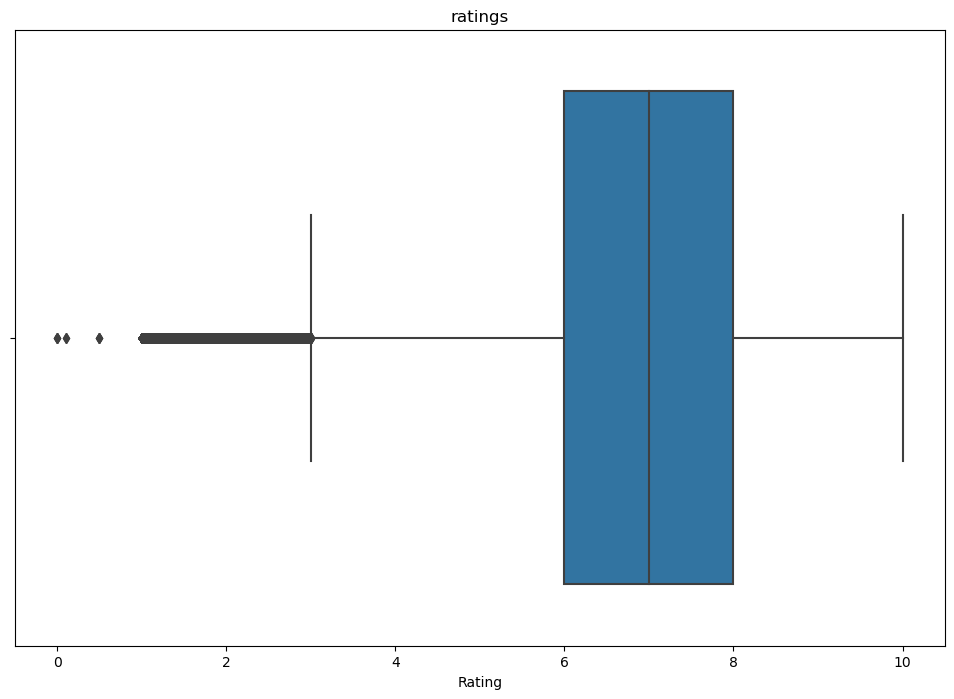

In [19]:
plot_box(all_paths_csv['user_ratings.csv']['Rating'],'ratings')

Distirbution plot of all Ratings

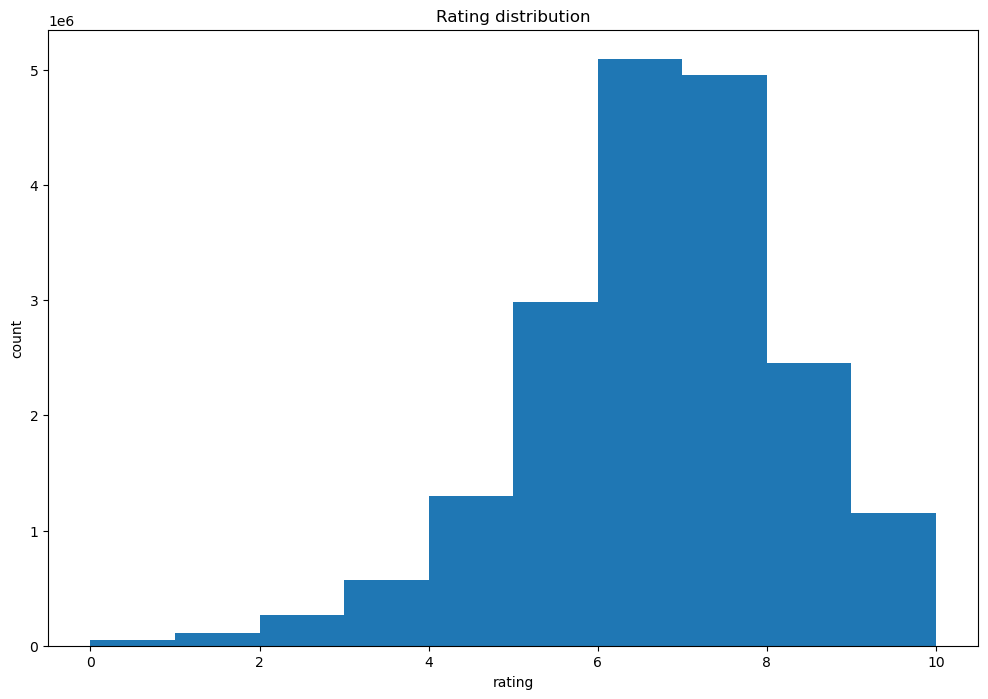

In [20]:
plot_dist(all_paths_csv['user_ratings.csv']['Rating'],'ratings')

#### Plotting BGGId against mean score just to confirm if there is any impact of the count of ratings on the average rating

<Figure size 1200x800 with 0 Axes>

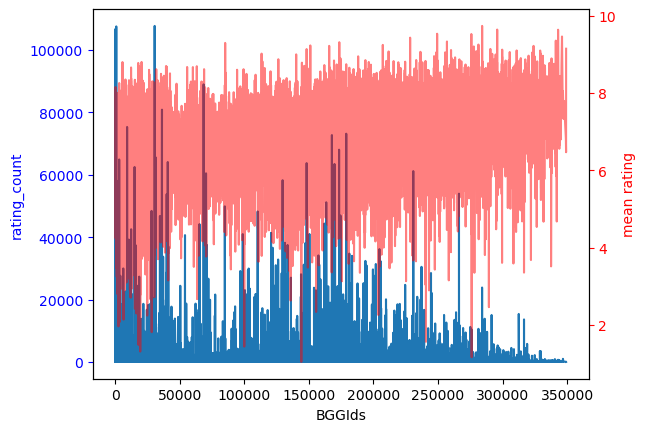

In [21]:
plt.figure(figsize=(12,8))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(all_paths_csv['user_ratings.csv'].groupby('BGGId')['Rating'].count())
ax1.set_xlabel('BGGIds')
ax1.set_ylabel('rating_count', color='b')
ax1.tick_params('y', colors='b')

# Plot the second graph on the right y-axis
ax2.plot(all_paths_csv['user_ratings.csv'].groupby('BGGId')['Rating'].agg(['mean']), 'r',alpha=0.5)
ax2.set_ylabel('mean rating', color='r')
ax2.tick_params('y', colors='r')

In [22]:
psdf = pl.from_pandas(all_paths_csv['user_ratings.csv'])

In [23]:
psdf

BGGId,Rating,Username
i64,f64,str
213788,8.0,"""Tonydorrf"""
213788,8.0,"""tachyon14k"""
213788,8.0,"""Ungotter"""
213788,8.0,"""brainlocki3"""
213788,8.0,"""PPMP"""
213788,8.0,"""Dychotimer"""
213788,8.0,"""BioNighty"""
213788,8.0,"""htwongah"""
213788,8.0,"""CunningLinguis..."


In [24]:
psdf.lazy().groupby("BGGId").agg([
    pl.col('Rating').mean()
]).collect()

BGGId,Rating
i64,f64
169984,5.598286
4096,5.533777
342016,6.131071
322560,6.960563
263168,7.31831
19456,4.744898
5120,6.094583
9216,7.619811
246784,7.619951


### games eda ###

In [25]:
all_paths_csv['games.csv']['Name'].nunique()

21521

In [26]:
non_unique_names = all_paths_csv['games.csv'][all_paths_csv['games.csv'].duplicated(['Name'], keep=False)]['Name'].tolist()

In [27]:
all_paths_csv['games.csv'][all_paths_csv['games.csv']['Name'].isin(non_unique_names)]

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.182270,2,4,...,21926,21926,0,1,0,0,0,0,0,0
14,15,Cosmic Encounter,request fantasy flight games board game geek l...,1977,2.3747,6.91053,6.43130,1.823430,2,6,...,21926,21926,1,1,0,0,0,0,0,0
27,28,Illuminati,classic steve jackson game world domination pl...,1987,2.6472,6.48160,6.15386,1.597290,2,8,...,21926,21926,1,1,0,0,0,0,0,0
32,34,Arkham Horror,arkham horror cooperative adventure game theme...,1987,2.3958,6.64889,5.73702,1.641220,1,8,...,21926,21926,1,0,0,0,0,0,0,0
40,43,Airlines,airline theme exactly suggest title game simil...,1990,2.4242,6.58402,5.68861,1.398300,2,6,...,21926,21926,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21829,337787,Summer Camp,find cabin assignment wre swimsuit relive day ...,2021,1.9444,7.42406,5.88818,1.156030,2,4,...,21926,21926,0,0,0,1,0,0,0,0
21872,341416,High Score,high score ingenious dice game unique challeng...,2021,1.0000,6.48167,5.54017,1.619270,2,5,...,21926,21926,0,0,0,0,0,0,0,0
21883,342016,Tetris,play tetris headtohead friend allnew tabletop ...,2021,0.0000,6.11451,5.51738,1.528510,2,4,...,21926,21926,0,0,0,0,0,0,0,0
21910,344697,"Warhammer 40,000: Kill Team",army number million clash battlefield spread t...,2021,3.0000,8.29345,5.62904,1.501460,2,4,...,21926,21926,0,0,0,0,0,0,0,0


In [28]:
all_paths_csv['games.csv']['YearPublished'].describe()

count    21925.000000
mean      1985.494914
std        212.486214
min      -3500.000000
25%       2001.000000
50%       2011.000000
75%       2017.000000
max       2021.000000
Name: YearPublished, dtype: float64

In [29]:
all_paths_csv['games.csv'][all_paths_csv['games.csv']['YearPublished'] == 400]

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
1535,2136,Pachisi,pachisi national game india date ad remain p...,400,1.2005,4.49847,4.68979,1.86166,2,6,...,21926,859,0,0,0,1,0,0,0,1
2043,2932,Hnefatafl,hnefatafl know vike game king table simply taf...,400,2.5408,6.60770,5.94680,1.46858,2,2,...,21926,21926,0,0,0,0,0,1,0,0


In [30]:
all_paths_csv['games.csv']['BestPlayers'].describe()

count    21925.000000
mean         0.311517
std          1.067002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: BestPlayers, dtype: float64

In [31]:
all_paths_csv['games.csv']['MinPlayers'].describe()

count    21925.000000
mean         2.007343
std          0.693093
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: MinPlayers, dtype: float64

In [32]:
all_paths_csv['games.csv']['MaxPlayers'].describe()

count    21925.000000
mean         5.707868
std         15.014643
min          0.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: MaxPlayers, dtype: float64

In [33]:
all_paths_csv['games.csv']['MfgAgeRec'].describe()

count    21925.000000
mean         9.613409
std          3.641560
min          0.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         25.000000
Name: MfgAgeRec, dtype: float64

In [34]:
all_paths_csv['games.csv'].corr()['AvgRating'] 

C:\Users\siaza\AppData\Local\Temp\ipykernel_7244\1622546845.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_paths_csv['games.csv'].corr()['AvgRating']


BGGId                  0.400820
YearPublished          0.079055
GameWeight             0.477728
AvgRating              1.000000
BayesAvgRating         0.480721
StdDev                -0.324789
MinPlayers            -0.172694
MaxPlayers            -0.040631
ComAgeRec              0.341907
LanguageEase          -0.004729
BestPlayers            0.212091
NumOwned               0.177861
NumWant                0.327680
NumWish                0.282074
NumWeightVotes         0.144487
MfgPlaytime            0.092817
ComMinPlaytime         0.039511
ComMaxPlaytime         0.092817
MfgAgeRec              0.189002
NumUserRatings         0.168007
NumComments                 NaN
NumAlternates         -0.066367
NumExpansions          0.153915
NumImplementations     0.101012
IsReimplementation     0.145946
Kickstarted            0.204418
Rank:boardgame        -0.685706
Rank:strategygames    -0.200654
Rank:abstracts         0.044340
Rank:familygames      -0.006237
Rank:thematic         -0.101780
Rank:cgs

In [35]:
all_paths_csv['games.csv']['GameWeight'].describe()

count    21925.000000
mean         1.982131
std          0.848983
min          0.000000
25%          1.333300
50%          1.968800
75%          2.525200
max          5.000000
Name: GameWeight, dtype: float64

In [36]:
games = all_paths_csv['games.csv']
numeric_columns = games.select_dtypes(include=np.number).columns
numeric_data = games.loc[:, numeric_columns]

In [37]:
all_paths_csv['games.csv']

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,...,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.579790,3,5,...,21926,21926,0,1,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktaking card game base old ga...,1981,1.9630,6.64537,5.78447,1.454400,3,4,...,21926,21926,0,1,0,0,0,0,0,0
2,3,Samurai,samurai set medieval japan player compete gain...,1998,2.4859,7.45601,7.23994,1.182270,2,4,...,21926,21926,0,1,0,0,0,0,0,0
3,4,Tal der Könige,triangular box luxurious large block tal der k...,1992,2.6667,6.60006,5.67954,1.231290,2,4,...,21926,21926,0,0,0,0,0,0,0,0
4,5,Acquire,acquire player strategically invest business t...,1964,2.5031,7.33861,7.14189,1.335830,2,6,...,21926,21926,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21920,347146,Salvage,oil tanker fire rescue team send deal damage...,2021,0.0000,7.45000,5.52462,1.554930,3,4,...,21926,21926,0,0,0,0,0,0,0,0
21921,347521,Blitzkrieg!: World War Two in 20 Minutes,new square edition include nippon expansion up...,2019,1.6667,7.92276,5.56323,0.894204,1,2,...,21926,21926,0,0,0,0,0,0,0,0
21922,348955,Rock Paper Scissors: Deluxe Edition,million year people force play timehonored gam...,2021,4.5625,6.96970,5.53964,4.052570,1,3,...,21926,21926,0,0,0,0,0,0,0,0
21923,349131,Splitter,splitter group number score point mdash s s md...,2021,1.0000,6.48235,5.52631,1.160070,1,12,...,21926,21926,0,0,0,0,0,0,0,0


In [39]:
all_paths_csv['games.csv']['MfgPlaytime'].describe()

count    21925.000000
mean        90.513523
std        529.657389
min          0.000000
25%         25.000000
50%         45.000000
75%         90.000000
max      60000.000000
Name: MfgPlaytime, dtype: float64

In [ ]:
all_paths_csv['games.csv'][all_paths_csv['games.csv']['YearPublished'] >= 2010].to_csv('games_after_2010.csv')

In hopes of keeping our further EDA and downstream processing more managable our scope is only games from 2010 onwards.

## taking a look at the missing values

In [40]:
user_ratings = all_paths_csv['user_ratings.csv']

In [41]:
user_ratings.isna().sum()

BGGId        0
Rating       0
Username    63
dtype: int64

Only one rating per BGGId we can afford to drop the missing values.

In [ ]:
 user_ratings[user_ratings.isnull().any(axis=1)].groupby('BGGId').count().sort_values('Rating',ascending=False)

In [ ]:
user_ratings_new = psdf.lazy().drop_nulls().collect().to_pandas()

In [ ]:
user_ratings_new.to_pandas().to_csv('..data/output/user_rating_no_null.csv',index=False)

## Conclusion Part 1 EDA

Our dataset is huge, at 18,000,000 + unique user and review combination across 21,925 different games.

Due to the scale of our data, we had to use polars over pandas as each transformation was taking a significant amount of time during our EDA phase.

### User Ratings(csv)
There is no clear relation between the board game average score and the number of reviews.
Our data is centralised around roughly a 7 rating.
There are only roughly 63 rows with missing user names and thus unusable for our further modelling that we removed. Further filtering will be handled later in 

### Games(csv)
Not all data is relevant e.g. games published in the year 400, however we do have some helpful data points such as 'mfgplaytime', 'gamewieght' etc so we may be able to use it for our deployment down the line.

As our problem statement is on the recommendation of modern games, we initially cut down our dataset to after 2010 in order to keep further downstream processing more managable.

